In [1]:
from fastai.vision.all import *

In [2]:
path = untar_data(URLs.PETS)

In [3]:
path.ls()

(#4) [Path('/home/anasys/.fastai/data/oxford-iiit-pet/annotations'),Path('/home/anasys/.fastai/data/oxford-iiit-pet/export.pkl'),Path('/home/anasys/.fastai/data/oxford-iiit-pet/aaa.pkl'),Path('/home/anasys/.fastai/data/oxford-iiit-pet/images')]

In [4]:
(path / 'images').ls()

(#7393) [Path('/home/anasys/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_81.jpg'),Path('/home/anasys/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_199.jpg'),Path('/home/anasys/.fastai/data/oxford-iiit-pet/images/Maine_Coon_93.jpg'),Path('/home/anasys/.fastai/data/oxford-iiit-pet/images/havanese_200.jpg'),Path('/home/anasys/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_80.jpg'),Path('/home/anasys/.fastai/data/oxford-iiit-pet/images/Russian_Blue_226.jpg'),Path('/home/anasys/.fastai/data/oxford-iiit-pet/images/scottish_terrier_179.jpg'),Path('/home/anasys/.fastai/data/oxford-iiit-pet/images/beagle_157.jpg'),Path('/home/anasys/.fastai/data/oxford-iiit-pet/images/Russian_Blue_112.jpg'),Path('/home/anasys/.fastai/data/oxford-iiit-pet/images/Birman_175.jpg')...]

In [6]:
fname = (path / 'images').ls()[0]
fname

Path('/home/anasys/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_81.jpg')

In [7]:
fname.name

'staffordshire_bull_terrier_81.jpg'

In [9]:
# この正規表現でファイル名からラベルが取得できる
re.findall(r'(.+)_\d+.jpg$', fname.name)

['staffordshire_bull_terrier']

In [11]:
# DataBlock APIを用いた dataloaders の作成
pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75))

In [12]:
dls = pets.dataloaders(path / 'images')

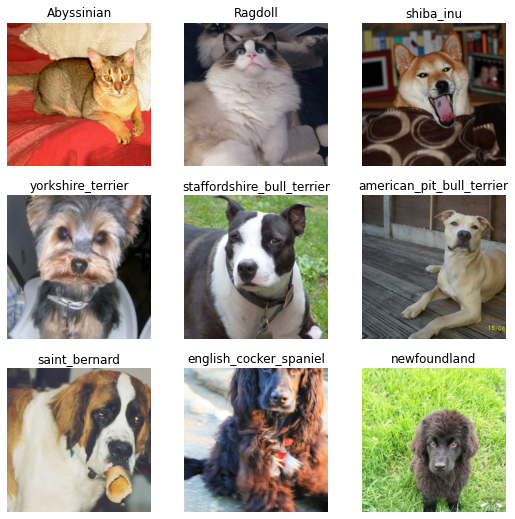

In [13]:
dls.show_batch()

In [15]:
x, y = dls.one_batch()
print(x.shape, y.shape)
print(y)

torch.Size([64, 3, 224, 224]) torch.Size([64])
TensorCategory([36, 30, 25, 32, 27, 19,  6, 17, 30,  2, 13,  7, 30, 26, 18, 24, 22, 11,
        22,  3, 27, 18, 24, 22,  1,  0,  7, 27, 20, 14, 15, 36, 15, 29, 17, 12,
        11, 24, 15, 13,  7,  5,  4,  3, 15, 12, 19, 16,  8, 36, 21, 16, 34,  5,
        14, 22, 25, 20,  8, 11,  7, 25, 20,  8], device='cuda:0')


In [17]:
len(dls.vocab), dls.vocab

(37,
 ['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier'])

In [19]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)

In [22]:
# DataBlockの定義に合わせてどのlossを使うかが決まる
learn.loss_func

FlattenedLoss of CrossEntropyLoss()

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.004365158267319202)

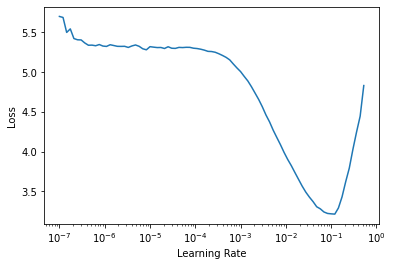

In [21]:
# 最適な学習率を見つける
learn.lr_find()

In [23]:
learn.fine_tune(2, base_lr=4e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.203214,0.301720,0.893775,00:33


epoch,train_loss,valid_loss,accuracy,time
0,0.572489,0.504258,0.857239,00:41
1,0.371226,0.236611,0.930988,00:41


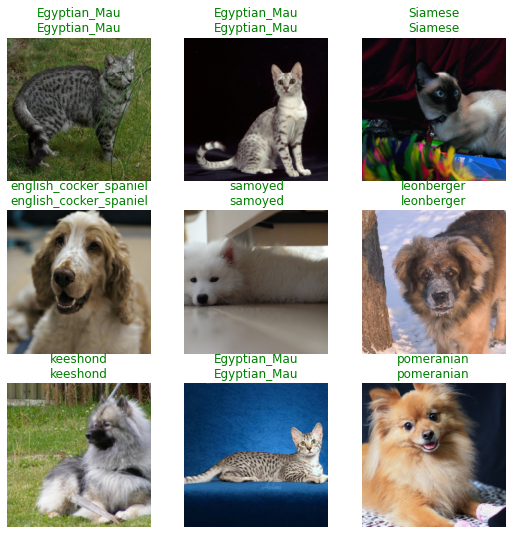

In [24]:
learn.show_results()

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

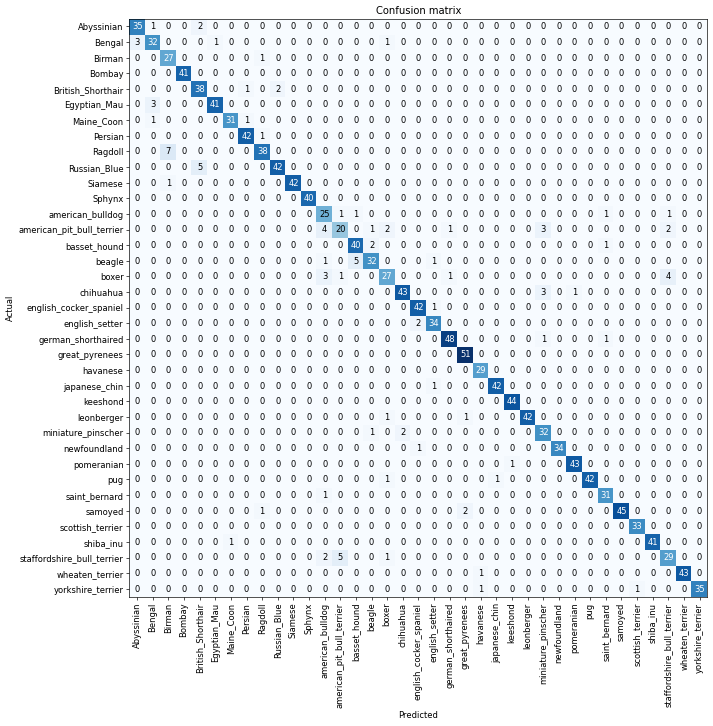

In [30]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [42]:
# どのような間違えが多いか？
interp.most_confused()[:3]

[('Ragdoll', 'Birman', 7),
 ('Russian_Blue', 'British_Shorthair', 5),
 ('beagle', 'basset_hound', 5)]

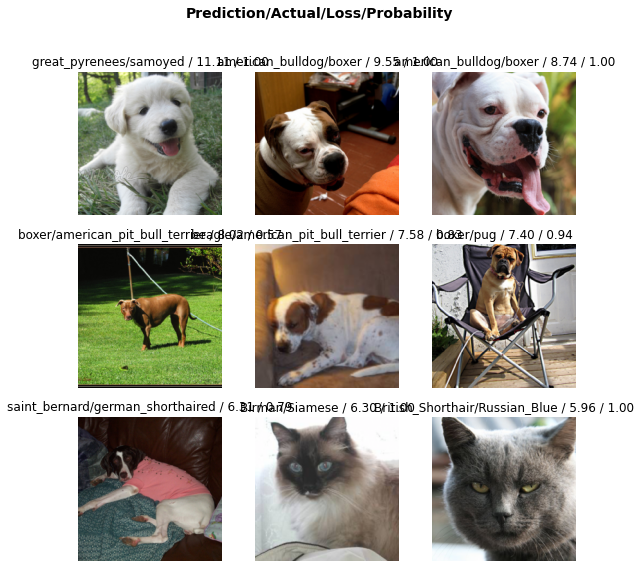

In [43]:
# Lossが高い誤り
interp.plot_top_losses(k=9)